In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

data_path = '/Users/haririvera/Desktop/Projects_TDA/project1/spotify-2023.csv'
spotify_data = pd.read_csv(data_path, encoding='ISO-8859-1')

spotify_data


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [110]:

spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

spotify_data.dropna(subset=['streams'], inplace=True)

spotify_data_sorted = spotify_data.sort_values(by='streams', ascending=False)

top_100_songs = spotify_data_sorted.head(100)

top_100_songs = top_100_songs.reset_index(drop=True)

top_100_songs


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Shivers,Ed Sheeran,1,2021,9,9,10147,30,1.302184e+09,234,...,141,D,Major,79,82,86,28,0,4,9
96,Heather,Conan Gray,1,2020,3,20,6170,7,1.301800e+09,82,...,92,F,Major,47,25,43,62,0,32,3
97,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1.297026e+09,24,...,135,NaN,Minor,48,44,42,12,2,11,3
98,Iris,The Goo Goo Dolls,1,1998,3,31,13101,9,1.284943e+09,137,...,156,B,Minor,32,49,72,0,0,9,4


In [111]:

columns_of_interest = [
    'track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]

top_100_songs = top_100_songs[columns_of_interest]

# Display the first few rows to verify
display(top_100_songs.head())



,track_name,artist(s)_name,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Blinding Lights,The Weeknd,43899,69,672,199,"3,421",20,NaN
1,Shape of You,Ed Sheeran,32181,10,33,0,"6,808",7,0
2,Someone You Loved,Lewis Capaldi,17836,53,440,125,"1,800",0,NaN
3,Dance Monkey,Tones and I,24529,0,533,167,"3,595",6,NaN
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",24094,78,372,117,843,4,69


The correlation coefficient between Top 100 songs and Spotify playlists is: -0.36547730099377257


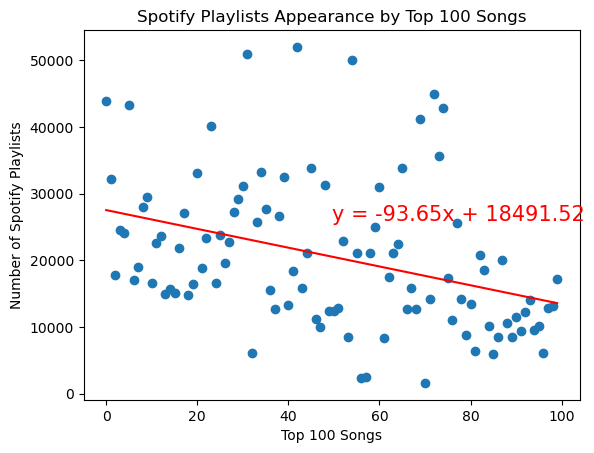

The r-squared is: 0.18587305068679535


In [112]:

correlation = st.pearsonr(top_100_songs.index, top_100_songs['in_spotify_playlists'])
print(f"The correlation coefficient between Top 100 songs and Spotify playlists is: {correlation[0]}")

# Calculate linear regression model for Spotify charts
(slope_spotify, intercept_spotify, rvalue_spotify, pvalue_spotify, stderr_spotify) = st.linregress(top_100_songs.index, top_100_songs['in_spotify_playlists'])

# Create scatter plot for Spotify charts
plt.scatter(top_100_songs.index, top_100_songs['in_spotify_playlists'])

# Plot regression line for Spotify charts
regress_values = top_100_songs.index * slope_spotify + intercept_spotify
plt.plot(top_100_songs.index, regress_values, "r-")

# Construct the line equation string for Spotify charts
line_eq_spotify = f"y = {slope_spotify:.2f}x + {intercept_spotify:.2f}"

plt.xlabel('Top 100 Songs')
plt.ylabel('Number of Spotify Playlists')
plt.title('Spotify Playlists Appearance by Top 100 Songs')

# Annotate line equation on the plot
plt.annotate(line_eq, (max(top_100_songs.index)/2, max(top_100_songs['in_spotify_playlists'])/2), fontsize=15, color="red")

# Show plot
plt.show()

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

The correlation coefficient between Top 100 songs and Spotify charts is: -0.08182573154574146


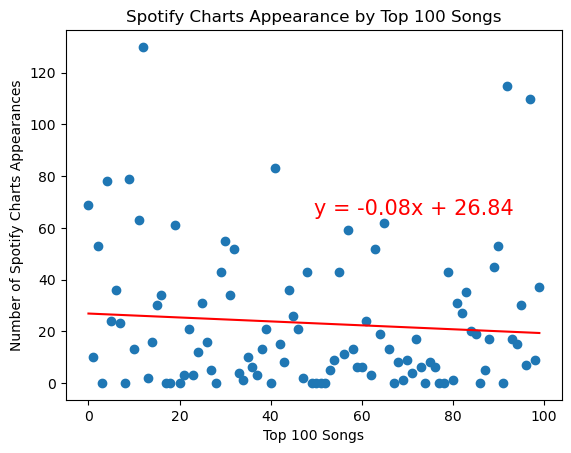

The r-squared for Spotify charts is: 0.006695450342995756


In [113]:
# Calculate correlation coefficient for Spotify charts
correlation_charts = st.pearsonr(top_100_songs.index, top_100_songs['in_spotify_charts'])
print(f"The correlation coefficient between Top 100 songs and Spotify charts is: {correlation_charts[0]}")

# Calculate linear regression model for Spotify charts
(slope_charts, intercept_charts, rvalue_charts, pvalue_charts, stderr_charts) = st.linregress(top_100_songs.index, top_100_songs['in_spotify_charts'])

# Create scatter plot for Spotify charts
plt.scatter(top_100_songs.index, top_100_songs['in_spotify_charts'])

# Plot regression line for Spotify charts
regress_values_charts = top_100_songs.index * slope_charts + intercept_charts
plt.plot(top_100_songs.index, regress_values_charts, "r-")

# Construct the line equation string for Spotify charts
line_eq_charts = f"y = {slope_charts:.2f}x + {intercept_charts:.2f}"

# Add labels and title for Spotify charts
plt.xlabel('Top 100 Songs')
plt.ylabel('Number of Spotify Charts Appearances')
plt.title('Spotify Charts Appearance by Top 100 Songs')

# Annotate line equation on the plot for Spotify charts
plt.annotate(line_eq_charts, (max(top_100_songs.index)/2, max(top_100_songs['in_spotify_charts'])/2), fontsize=15, color="red")

# Show plot for Spotify charts
plt.show()

# Print r-squared value for Spotify charts
print(f"The r-squared for Spotify charts is: {rvalue_charts**2}")

The correlation coefficient between Top 100 Songs and Apple playlists is: -0.5316187346458188


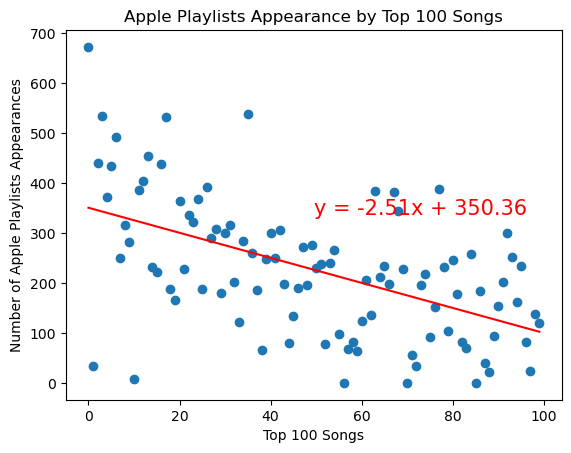

The r-squared for Apple playlists is: 0.28261847902642134


In [114]:
# Calculate correlation coefficient for Apple playlists
correlation_apple = st.pearsonr(top_100_songs.index, top_100_songs['in_apple_playlists'])
print(f"The correlation coefficient between Top 100 Songs and Apple playlists is: {correlation_apple[0]}")

# Calculate linear regression model for Apple playlists
(slope_apple, intercept_apple, rvalue_apple, pvalue_apple, stderr_apple) = st.linregress(top_100_songs.index, top_100_songs['in_apple_playlists'])

# Create scatter plot for Apple playlists
plt.scatter(top_100_songs.index, top_100_songs['in_apple_playlists'])

# Plot regression line for Apple playlists
regress_values_apple = top_100_songs.index * slope_apple + intercept_apple
plt.plot(top_100_songs.index, regress_values_apple, "r-")

# Construct the line equation string for Apple playlists
line_eq_apple = f"y = {slope_apple:.2f}x + {intercept_apple:.2f}"

# Add labels and title for Apple playlists
plt.xlabel('Top 100 Songs')
plt.ylabel('Number of Apple Playlists Appearances')
plt.title('Apple Playlists Appearance by Top 100 Songs')

# Annotate line equation on the plot for Apple playlists
plt.annotate(line_eq_apple, (max(top_100_songs.index)/2, max(top_100_songs['in_apple_playlists'])/2), fontsize=15, color="red")

# Show plot for Apple playlists
plt.show()

# Print r-squared value for Apple playlists
print(f"The r-squared for Apple playlists is: {rvalue_apple**2}")


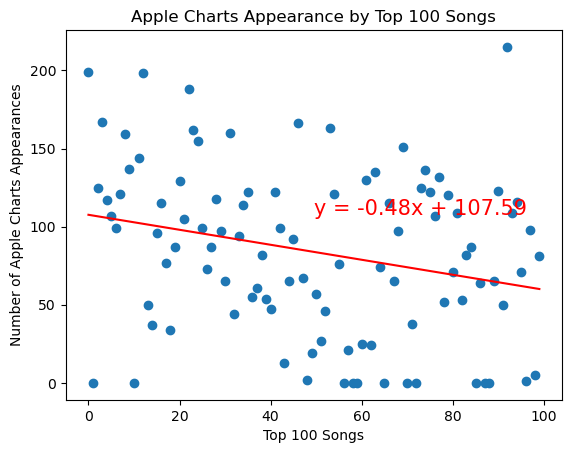

The r-squared for Apple charts is: 0.06722250307554475


In [115]:
# Calculate correlation coefficient for Apple charts
correlation_apple_charts = st.pearsonr(top_100_songs.index, top_100_songs['in_apple_charts'])

# Calculate linear regression model for Apple charts
(slope_apple_charts, intercept_apple_charts, rvalue_apple_charts, pvalue_apple_charts, stderr_apple_charts) = st.linregress(top_100_songs.index, top_100_songs['in_apple_charts'])

# Create scatter plot for Apple charts
plt.scatter(top_100_songs.index, top_100_songs['in_apple_charts'])

# Plot regression line for Apple charts
regress_values_apple_charts = top_100_songs.index * slope_apple_charts + intercept_apple_charts
plt.plot(top_100_songs.index, regress_values_apple_charts, "r-")

# Construct the line equation string for Apple charts
line_eq_apple_charts = f"y = {slope_apple_charts:.2f}x + {intercept_apple_charts:.2f}"

# Add labels and title for Apple charts
plt.xlabel('Top 100 Songs')
plt.ylabel('Number of Apple Charts Appearances')
plt.title('Apple Charts Appearance by Top 100 Songs')

# Annotate line equation on the plot for Apple charts
plt.annotate(line_eq_apple_charts, (max(top_100_songs.index)/2, max(top_100_songs['in_apple_charts'])/2), fontsize=15, color="red")

# Show plot for Apple charts
plt.show()

# Print r-squared value for Apple charts
print(f"The r-squared for Apple charts is: {rvalue_apple_charts**2}")


The correlation coefficient between chart position and Deezer playlists appearances is: 0.19318470349591332


/var/folders/p9/7hlypgw50t14mvlnv6dcmjw80000gn/T/ipykernel_11458/3722834095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_100_songs['in_shazam_charts'] = pd.to_numeric(top_100_songs['in_shazam_charts'], errors='coerce')


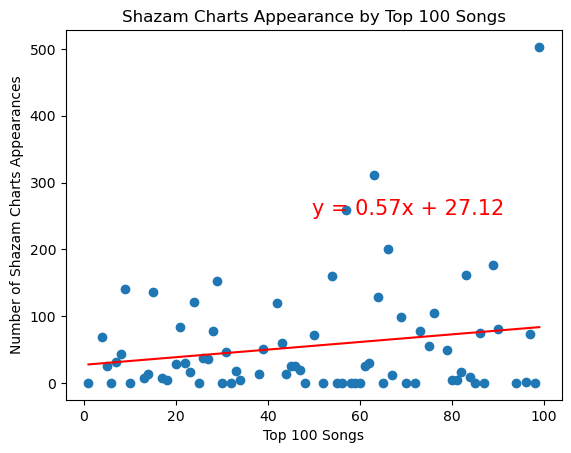

The r-squared for Shazam Charts is: 0.03732032966480393


In [116]:
top_100_songs['in_shazam_charts'] = pd.to_numeric(top_100_songs['in_shazam_charts'], errors='coerce')
top_100_songs = top_100_songs.dropna(subset=['in_shazam_charts'])

# Calculate correlation coefficient for Deezer playlists
correlation_shazam_charts = st.pearsonr(top_100_songs.index, top_100_songs['in_shazam_charts'])
print(f"The correlation coefficient between chart position and Deezer playlists appearances is: {correlation_shazam_charts[0]}")

# Calculate linear regression model for Deezer playlists
(slope_shazam_charts, intercept_shazam_charts, rvalue_shazam_charts, pvalue_shazam_charts, stderr_shazam_charts) = st.linregress(top_100_songs.index, top_100_songs['in_shazam_charts'])

# Create scatter plot for Deezer playlists
plt.scatter(top_100_songs.index, top_100_songs['in_shazam_charts'])

# Plot regression line for Deezer playlists
regress_values_shazam_charts = top_100_songs.index * slope_shazam_charts + intercept_shazam_charts
plt.plot(top_100_songs.index, regress_values_shazam_charts, "r-")

# Construct the line equation string for Deezer playlists
line_eq_shazam_charts = f"y = {slope_shazam_charts:.2f}x + {intercept_shazam_charts:.2f}"

# Add labels and title for Deezer playlists
plt.xlabel('Top 100 Songs')
plt.ylabel('Number of Shazam Charts Appearances')
plt.title('Shazam Charts Appearance by Top 100 Songs')

# Annotate line equation on the plot for Deezer playlists
plt.annotate(line_eq_shazam_charts, (max(top_100_songs.index)/2, max(top_100_songs['in_shazam_charts'])/2), fontsize=15, color="red")

# Show plot for Deezer playlists
plt.show()

# Print r-squared value for Deezer playlists
print(f"The r-squared for Shazam Charts is: {rvalue_shazam_charts**2}")